# Dimensionality Reduction: the Notebook

The docs for many methods are available here:

http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition

Some particular sub-links:
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html#sklearn.decomposition.SparsePCA

In this notebook, I have a few tasks for you to try out related to PCA :)

In [7]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA

#from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans 

from sklearn.datasets import make_swiss_roll
from sklearn.datasets import make_s_curve
from sklearn.datasets import make_circles

(1000, 2)
Explained variance ratio: 

Cumulative explained variance: 

PCA components: 



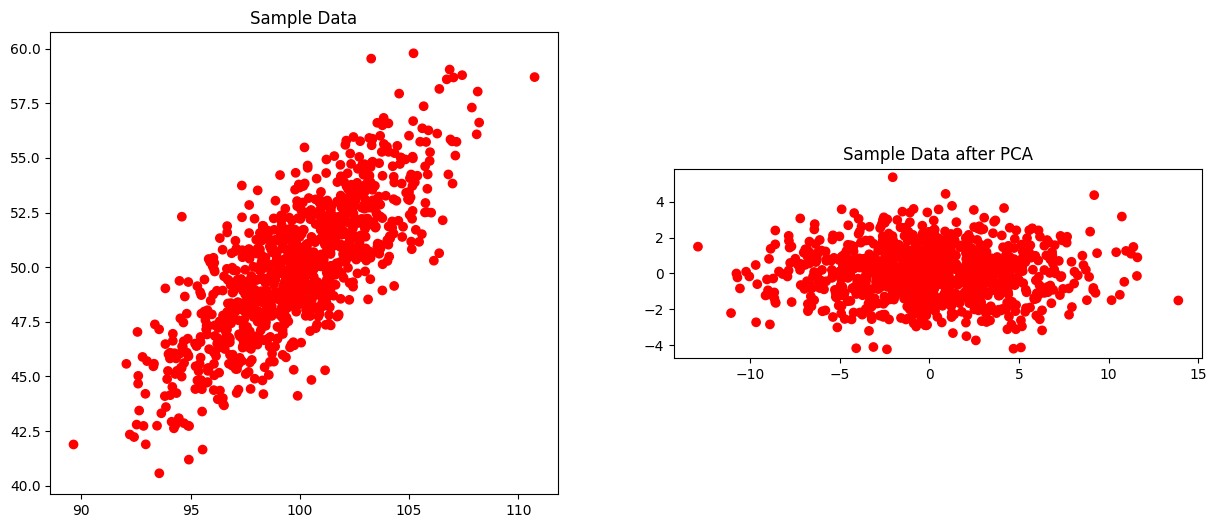

In [20]:
# small sample data set and PCA process
np.random.seed(42)

covar = 8
dat_low = np.random.multivariate_normal([100, 50], [[10, covar], [covar, 10]], 1000)

print (dat_low.shape)

plt.figure(figsize=(15, 6))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
p = plt.subplot(1, 2, 1)
p.scatter(dat_low[:, 0], dat_low[:, 1], c=[1 for i in range(dat_low.shape[0])], cmap=cm_bright)
p.set_aspect('equal')
p.set_title("Sample Data")

n_comp = 2
pca_mod = PCA(n_components = n_comp)
pca_mod.fit(dat_low)
new_pca_features = pca_mod.transform(dat_low)


print ('Explained variance ratio: \n'), pca_mod.explained_variance_ratio_ 
print ('Cumulative explained variance: \n'), np.cumsum(pca_mod.explained_variance_ratio_)
print ('PCA components: \n'), pca_mod.components_ 


p = plt.subplot(1, 2, 2)
p.scatter(new_pca_features[:, 0], new_pca_features[:, 1], 
          c=[1 for i in range(new_pca_features.shape[0])], cmap=cm_bright)
p.set_aspect('equal')
p.set_title("Sample Data after PCA")
plt.show()

## Task 1: PCA -- visualizing PCA and choosing the number of components

Some code is provided to generate correlated data in an arbitrary number of dimensions.

NOTE: Do not set the dimensions for make_correlated_data to anything less than 3

1. Use the independent data first. Plot the amount of explained variance vs the number of components. How can you use this chart to choose the number of componenets? Examine the function make_independent_data, look particularly at the covariance used to generate the data. Does this explain the PCA results?
I can use this chart to choose number of components by looking at the explained variance. This can come from the proportion of the data's variance by each principal component.
 The PCA results are fair distance apart from one another and can be seen as equidistant. As result, this makes for low variance and higher explained data by following a particular pattern allowing for more explained data.

2. Examine the principle components themselves. How can you tell which original dimensions are being used in the componenets? What changes as you switch between independent data and correlated data? What happens as you increase phi from a low value (e.g. 0.1) to a high value (e.g 0.9) when you generate correlated data?
The loadings of features on the principal components may change. As the correlation between features increases, the loadings of features on the principal components may shift to reflect the stronger relationships between the features.

The explained variance of the principal components may change. With higher correlation between features, some principal components may capture more variance in the data as they account for both the variance and the correlations between features.

The interpretation of the principal components may change. In highly correlated data, principal components may represent patterns or relationships between features rather than just the variance in the data. Therefore, the interpretation of the principal components may differ compared to when the data is independent or weakly correlated.

3. Try the first question again with the correlated data.
The PCA results are explained as the coefficients that define the transformation of the original dataset into a new set of orthogonal variable's components that capture the maximum variance in the data.

In [5]:
np.random.seed(42)

def make_independent_data(dimension=3, n=1000):
    '''
    Makes independent data in "dimension" dimensions
    '''
    covar = np.diag([10 / float( (i + 1) ** 2) for i in range(dimension)])
    dat_i = np.random.multivariate_normal([0 for i in range(dimension)], 
                                         covar, n)
    
    return dat_i


def make_correlated_data(dimension, phi=0.5, n=1000):
    '''
    Makes dependent data in "dimension" dimensions, correlation between
    index-adjacent dimensions controlled with "phi"
    NOTE: Phi must be between 0 and 1
    '''
    dat_i = make_independent_data(dimension, n)
    
    diag_D = np.concatenate([[1], [1 / np.sqrt(1 - phi**2) for i in range(dimension - 1)]])
    D = np.diag(diag_D)

    fc_L = np.concatenate([[1, phi], [0 for i in range(dimension-2)]])
    fr_L = np.concatenate([[1], [0 for i in range(dimension-1)]])

    L = sp.linalg.toeplitz(fc_L, fr_L)
    S = np.dot(D, L)
    
    dat_rotated = np.dot(dat_i, S)
    
    return dat_rotated

PCA components:


Explained variance ratio: 

Cumulative explained variance: 



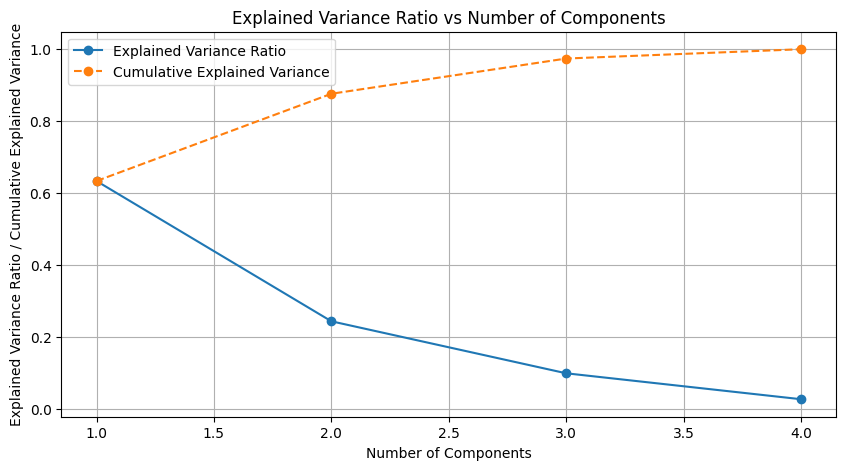

PCA components:
 [[ 0.71988358  0.67350843  0.1674275   0.01104819]
 [ 0.53675578 -0.39261772 -0.71405978 -0.21877659]
 [ 0.40849749 -0.55389722  0.4333553   0.58183404]
 [-0.16367854  0.29229368 -0.52372688  0.78325213]]


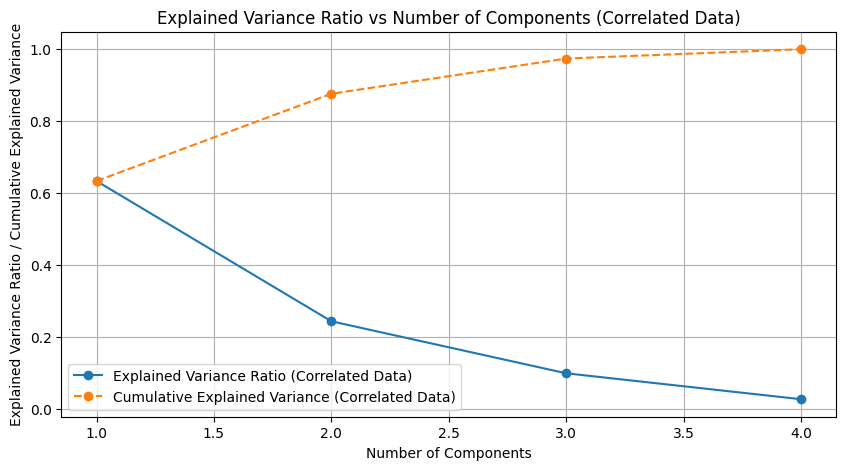

In [8]:
# generate some data
dat_independent = make_independent_data(4)
dat_rotated = make_correlated_data(4, phi=0.9)

# perform PCA
n_comp = 4
pca_mod = PCA(n_components = n_comp)
pca_mod.fit(dat_rotated)

print ('PCA components:\n'), pca_mod.components_
print()
print ('Explained variance ratio: \n'), pca_mod.explained_variance_ratio_ 
print ('Cumulative explained variance: \n'), np.cumsum(pca_mod.explained_variance_ratio_)

# Question 1: Use the independent data first. Plot the amount of explained variance vs the number of components.
explained_variance_ratio = pca_mod.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_comp + 1), explained_variance_ratio, marker='o', label='Explained Variance Ratio')
plt.plot(range(1, n_comp + 1), cumulative_explained_variance, marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.title('Explained Variance Ratio vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio / Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Question 2: Examine the principle components themselves.
print('PCA components:\n', pca_mod.components_)

# Question 3: Try the first question again with the correlated data.
# perform PCA on correlated data
pca_mod_correlated = PCA(n_components=n_comp)
pca_mod_correlated.fit(dat_rotated)

explained_variance_ratio_correlated = pca_mod_correlated.explained_variance_ratio_
cumulative_explained_variance_correlated = np.cumsum(explained_variance_ratio_correlated)

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_comp + 1), explained_variance_ratio_correlated, marker='o', label='Explained Variance Ratio (Correlated Data)')
plt.plot(range(1, n_comp + 1), cumulative_explained_variance_correlated, marker='o', linestyle='--', label='Cumulative Explained Variance (Correlated Data)')
plt.title('Explained Variance Ratio vs Number of Components (Correlated Data)')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio / Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

## Task 2: Non-linear Methods （Bonus Question）

1. Use the circles data. Plot the data, fit regular PCA to the data. Is this very effective? Why or why not?
Yes it does seem effective as the data was very well fitted in the desired locations. The dimensionality is relatively high and creates for a more effective visual.

2. Now try using KernelPCA instead. This is a little trickier than regular PCA; follow these steps:

2a: Fit Kernel PCA to the circles data using KernelPCA, try 5 components to start. Use the rbf kernel, with gamma = 1 (see the arguments in the documentation).

2b: The lambda\_ values roughly correspond to the amount of explained variance. You'll need to normalize by their sum to get an idea of how much variance each component explains. How much variance do the number of componenets explain? Try adding more than 5 componenets: do these extra components add any value? Explore the resulting data by plotting 2D projections. Which component of the resulting data would be a good projection to 1D?

2c: It is not easy to see exactly what each component means in the original space, but we can look at the data points projected into the kernel PCA space. Use the alpha\_ values to see this. Make a plot for both the inner and outer circle. Do you see any patterns?

If you have time, try this process on:

swiss roll data
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html

s curve data
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_s_curve.html#sklearn.datasets.make_s_curve

these don't have two pieces like the circle data, but have a simple nonlinear structure that can be captured with kernel PCA.

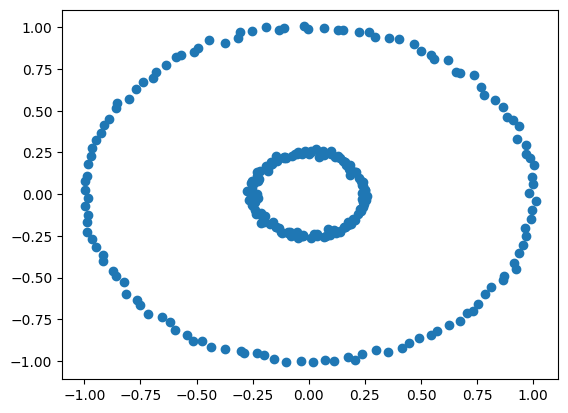

In [10]:
np.random.seed(42)
# make some circle data:
# dat_circles is the raw data, dat_circle label is a label indicating
# if the point is in the inner or outer circle (see the plot below)
dat_circles, dat_circle_label = make_circles(250, noise=0.01, factor=0.25)

# simple scatterplot of the data, so you get the idea ;)
plt.scatter(dat_circles[:, 0], dat_circles[:, 1])
plt.show()

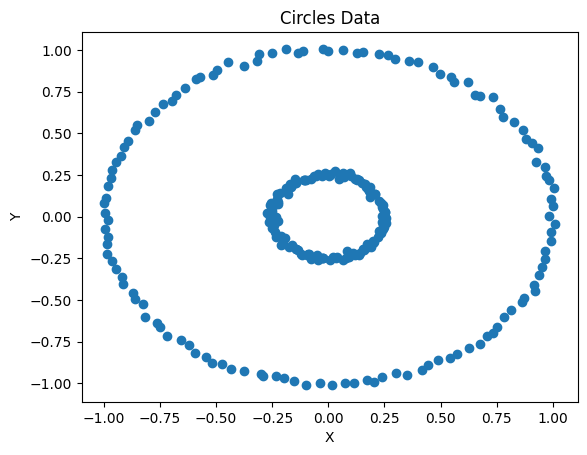

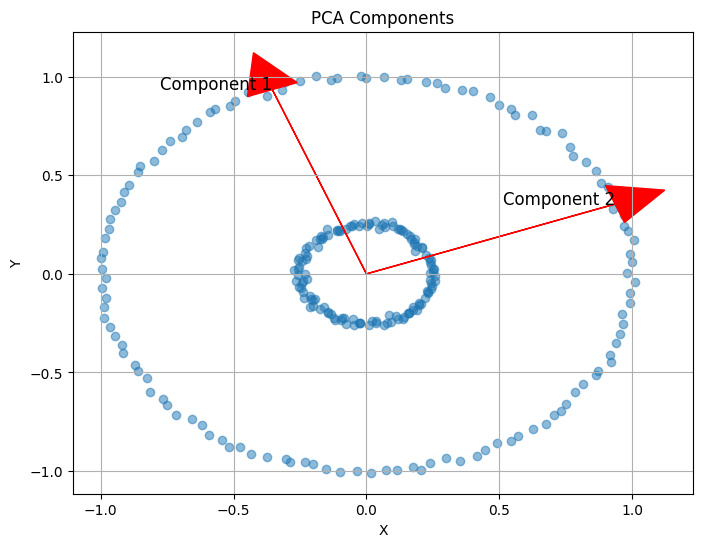

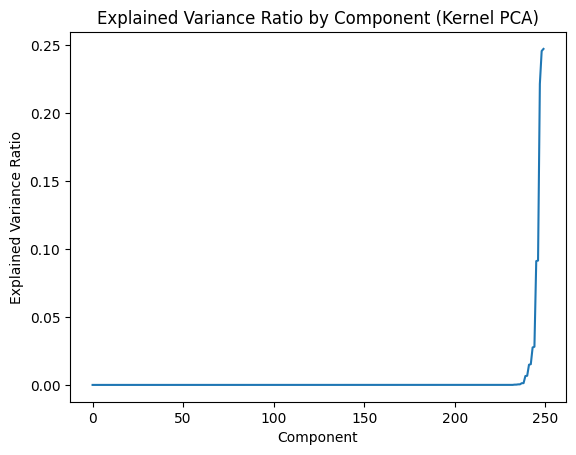

In [18]:
# 1. Use the circles data. Plot the data, fit regular PCA to the data.

# Plot the circles data
plt.scatter(dat_circles[:, 0], dat_circles[:, 1])
plt.title('Circles Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Fit regular PCA to the circles data
pca = PCA(n_components=2)
pca.fit(dat_circles)

# Plot PCA components
plt.figure(figsize=(8, 6))
plt.scatter(dat_circles[:, 0], dat_circles[:, 1], alpha=0.5)
for i, (comp_x, comp_y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, comp_x, comp_y, head_width=0.2, head_length=0.2, fc='r', ec='r')
    plt.text(comp_x, comp_y, f'Component {i+1}', fontsize=12, ha='right')
plt.title('PCA Components')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# Fit Kernel PCA to the circles data
kpca = KernelPCA(kernel="rbf", gamma=1, n_components=5)
kpca.fit(dat_circles)
kpca_data = kpca.transform(dat_circles)

# Calculate the centered kernel matrix
K = kpca._get_kernel(dat_circles)

# Center the kernel matrix
n_samples = dat_circles.shape[0]
one_n = np.ones((n_samples, n_samples)) / n_samples
K_centered = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

# Compute eigenvalues of the centered kernel matrix
eigenvalues = np.linalg.eigvalsh(K_centered)

# Calculate explained variance ratio for Kernel PCA
explained_variance_ratio_kpca = eigenvalues / np.sum(eigenvalues)

# Plot the explained variance ratio
plt.plot(explained_variance_ratio_kpca)
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Component (Kernel PCA)')
plt.show()

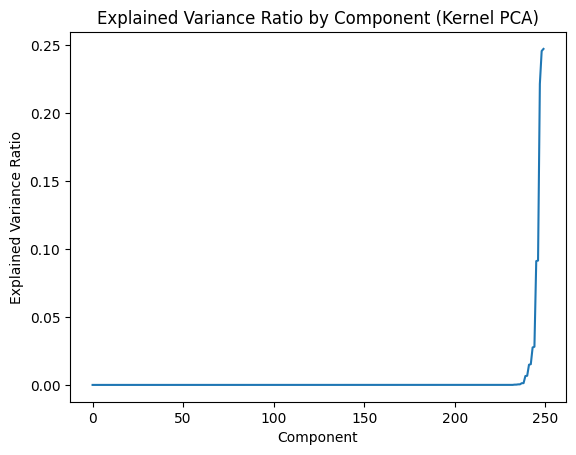

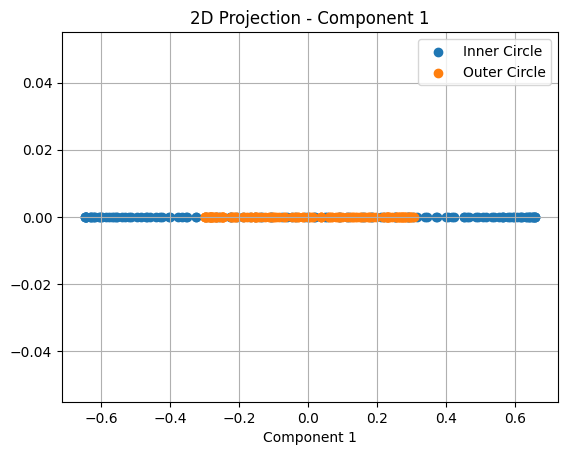

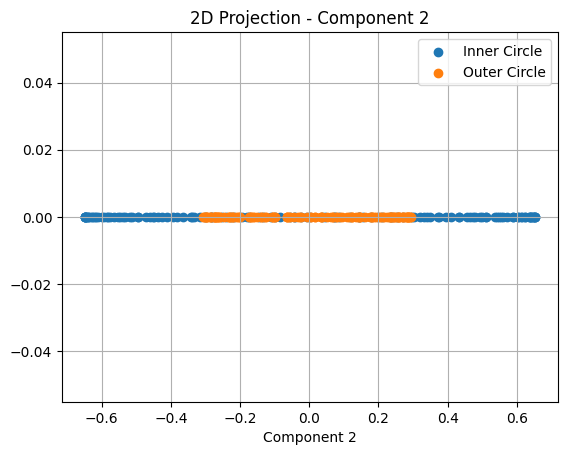

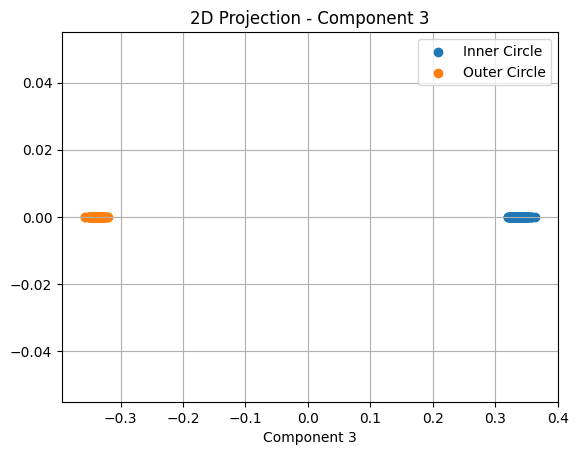

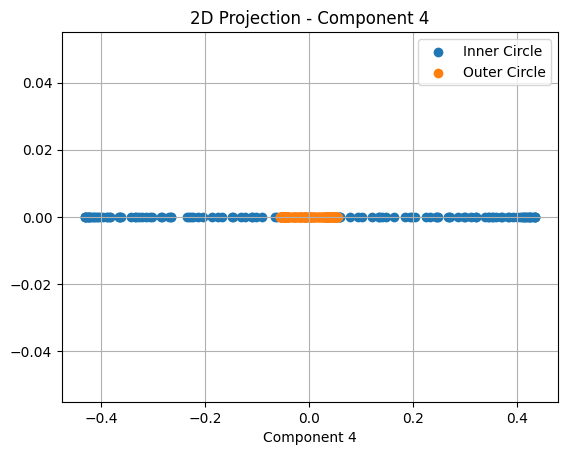

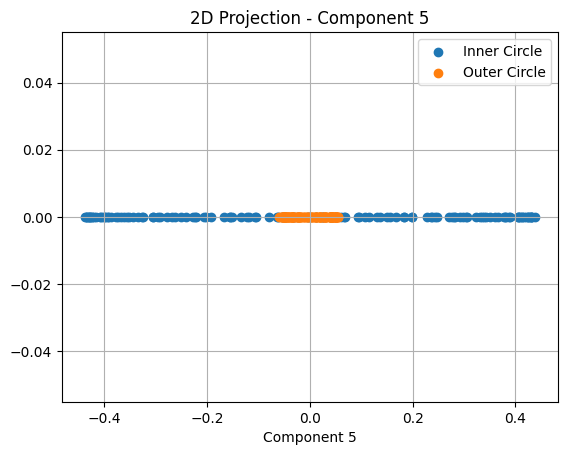

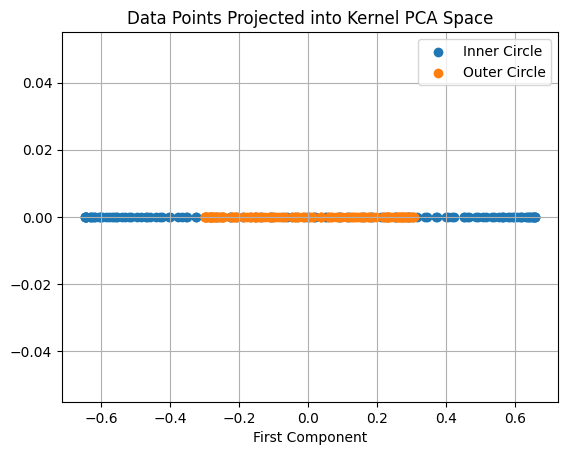

In [17]:
# 2. Now try using KernelPCA instead.

# Fit Kernel PCA to the circles data
kpca = KernelPCA(kernel="rbf", gamma=1, n_components=5)
kpca.fit(dat_circles)
kpca_data = kpca.transform(dat_circles)

# Calculate the centered kernel matrix
K = kpca._get_kernel(dat_circles)

# Center the kernel matrix
n_samples = dat_circles.shape[0]
one_n = np.ones((n_samples, n_samples)) / n_samples
K_centered = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

# Compute eigenvalues of the centered kernel matrix
eigenvalues = np.linalg.eigvalsh(K_centered)

# Calculate explained variance ratio for Kernel PCA
explained_variance_ratio_kpca = eigenvalues / np.sum(eigenvalues)

# Plot the explained variance ratio
plt.plot(explained_variance_ratio_kpca)
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Component (Kernel PCA)')
plt.show()


# Plot 2D projections
for i in range(5):
    plt.scatter(kpca_data[dat_circle_label == 0, i], np.zeros_like(kpca_data[dat_circle_label == 0, i]), label='Inner Circle')
    plt.scatter(kpca_data[dat_circle_label == 1, i], np.zeros_like(kpca_data[dat_circle_label == 1, i]), label='Outer Circle')
    plt.xlabel(f'Component {i+1}')
    plt.title(f'2D Projection - Component {i+1}')
    plt.legend()
    plt.grid(True)
    plt.show()

# 2c: Plot data points projected into the kernel PCA space
# Plot data points projected into the Kernel PCA space
plt.scatter(kpca_data[dat_circle_label == 0, 0], np.zeros_like(kpca_data[dat_circle_label == 0, 0]), label='Inner Circle')
plt.scatter(kpca_data[dat_circle_label == 1, 0], np.zeros_like(kpca_data[dat_circle_label == 1, 0]), label='Outer Circle')
plt.xlabel('First Component')
plt.title('Data Points Projected into Kernel PCA Space')
plt.legend()
plt.grid(True)
plt.show()
